In [54]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv(r"housing_train.csv")

In [56]:
df.head()
df.shape

(7536, 16)

In [57]:
df.isnull().sum()/len(df)

Suburb          0.000000
Address         0.000000
Rooms           0.000000
Type            0.000000
Price           0.000000
Method          0.000000
SellerG         0.000000
Distance        0.000000
Postcode        0.000000
Bedroom2        0.206874
Bathroom        0.206874
Car             0.206874
Landsize        0.207537
BuildingArea    0.558519
YearBuilt       0.493232
CouncilArea     0.207537
dtype: float64

In [58]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,Brunswick,52 Evans St,3,h,1650000,S,Nelson,5.2,3056,3.0,1.0,2.0,495.0,141.0,1920.0,Moreland
1,Reservoir,85 Radford Rd,5,h,791000,S,Ray,11.2,3073,4.0,3.0,1.0,961.0,NaN,NaN,Darebin
2,Newport,99 Anderson St,3,h,785000,S,RT,8.4,3015,3.0,1.0,1.0,185.0,NaN,NaN,Hobsons Bay
3,Brighton East,4/377 South Rd,2,u,755000,SP,Buxton,10.7,3187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hawthorn East,3 Jaques St,5,h,2500000,VB,RT,7.5,3123,5.0,3.0,3.0,757.0,240.0,1925.0,Boroondara


<AxesSubplot:>

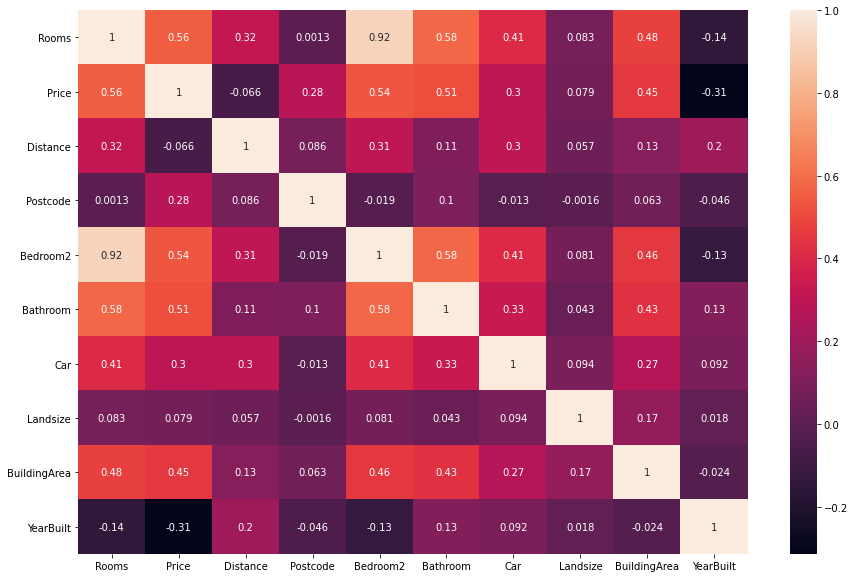

In [59]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cbar=True)


In [60]:
len(df.Address.unique())

7468

In [61]:
len(df.Suburb.unique())

142

In [62]:
len(df.CouncilArea.unique())

20

In [63]:
df[df.Rooms==9].head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
7172,Oakleigh South,17 Windsor Av,9,h,1380000,S,Ray,14.7,3167,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df.drop(df.index[7172],inplace=True,axis=0)

In [65]:
from statistics import mode

In [66]:
df.groupby('Rooms').Bathroom.apply(lambda x: x.fillna(x.mode()[0]))

0       1.0
1       3.0
2       1.0
3       1.0
4       3.0
       ... 
7531    1.0
7532    1.0
7533    2.0
7534    2.0
7535    1.0
Name: Bathroom, Length: 7535, dtype: float64

In [67]:
df['Bathroom']=df.groupby('Rooms').Bathroom.apply(lambda x: x.fillna(x.mode()[0]))
df.isnull().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Distance           0
Postcode           0
Bedroom2        1558
Bathroom           0
Car             1558
Landsize        1563
BuildingArea    4208
YearBuilt       3716
CouncilArea     1563
dtype: int64

In [68]:
df['Car']=df.groupby('Rooms').Car.apply(lambda x: x.fillna(x.mode()[0]))
df['Landsize']=df.groupby('Rooms').Landsize.apply(lambda x: x.fillna(x.mean()))

In [69]:
df['YearBuilt']=df.groupby('Rooms').YearBuilt.apply(lambda x: x.fillna(x.median()))
df['BuildingArea']=df.groupby('Rooms').BuildingArea.apply(lambda x: x.fillna(x.median()))

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7535 entries, 0 to 7535
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        7535 non-null   object 
 1   Address       7535 non-null   object 
 2   Rooms         7535 non-null   int64  
 3   Type          7535 non-null   object 
 4   Price         7535 non-null   int64  
 5   Method        7535 non-null   object 
 6   SellerG       7535 non-null   object 
 7   Distance      7535 non-null   float64
 8   Postcode      7535 non-null   int64  
 9   Bedroom2      5977 non-null   float64
 10  Bathroom      7535 non-null   float64
 11  Car           7535 non-null   float64
 12  Landsize      7535 non-null   float64
 13  BuildingArea  7535 non-null   float64
 14  YearBuilt     7535 non-null   float64
 15  CouncilArea   5972 non-null   object 
dtypes: float64(7), int64(3), object(6)
memory usage: 1000.7+ KB


In [71]:
df.drop(['CouncilArea','Address','Bedroom2','Suburb'],axis=1,inplace=True)

In [72]:
df.select_dtypes(include='object')

,Type,Method,SellerG
0,h,S,Nelson
1,h,S,Ray
2,h,S,RT
3,u,SP,Buxton
4,h,VB,RT
...,...,...,...
7531,u,PI,Burnham
7532,h,SP,Nelson
7533,h,PI,Jellis
7534,h,S,hockingstuart


In [73]:
df.isnull().sum()

Rooms           0
Type            0
Price           0
Method          0
SellerG         0
Distance        0
Postcode        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
dtype: int64

In [74]:
df.head()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,3,h,1650000,S,Nelson,5.2,3056,1.0,2.0,495.000000,141.0,1920.0
1,5,h,791000,S,Ray,11.2,3073,3.0,1.0,961.000000,286.0,1950.0
2,3,h,785000,S,RT,8.4,3015,1.0,1.0,185.000000,130.0,1960.0
3,2,u,755000,SP,Buxton,10.7,3187,1.0,1.0,301.031467,84.0,1970.0
4,5,h,2500000,VB,RT,7.5,3123,3.0,3.0,757.000000,240.0,1925.0


c:\users\vasudev\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

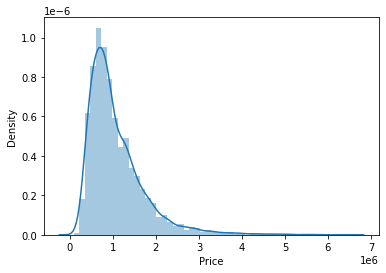

In [75]:
sns.distplot(df.Price)

In [76]:
df.Price=np.log(df.Price)

c:\users\vasudev\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

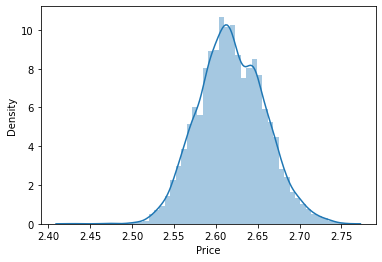

In [77]:
sns.distplot(np.log(df.Price))

In [78]:
df.Method=df.Method.str.strip()

In [79]:
df.Method.value_counts()

S     4893
PI     979
SP     932
VB     703
SA      28
Name: Method, dtype: int64

In [80]:
rep_value=df.SellerG.value_counts().head(15).index.tolist()
rep_value

['Nelson',
 'Jellis',
 'hockingstuart',
 'Barry',
 'Marshall',
 'Buxton',
 'Ray',
 'Biggin',
 'Brad',
 'Woodards',
 'Fletchers',
 'RT',
 'Greg',
 'Miles',
 'Sweeney']

In [81]:
df['SellerG']=df['SellerG'].apply(lambda x: x if x in rep_value else 'other')

In [82]:
df.SellerG.unique()

array(['Nelson', 'Ray', 'RT', 'Buxton', 'other', 'hockingstuart',
       'Fletchers', 'Jellis', 'Marshall', 'Biggin', 'Barry', 'Miles',
       'Sweeney', 'Greg', 'Brad', 'Woodards'], dtype=object)

In [83]:
X=df.drop('Price',axis=1)

In [84]:
y=df.Price

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [87]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [88]:
trf1=ColumnTransformer(transformers=[('encoder1',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,3])],remainder='passthrough')
trf2=ColumnTransformer(transformers=[('encoder2',OneHotEncoder(sparse=False,handle_unknown='ignore'),[-8])],remainder='passthrough')

In [89]:
trf3=RandomForestRegressor()

In [90]:
pipe=make_pipeline(trf1,trf2,trf3)

In [91]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder1',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 3])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder2',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [-8])])),
                ('randomforestregressor', RandomForestRegressor())])

In [93]:
pred=pipe.predict(X_test)

In [94]:
rmse=np.sqrt(MSE(pred,y_test))

In [95]:
rmse

0.2229257196312619

In [96]:
from sklearn.metrics import r2_score
r2_score(pred,y_test)

0.8023803605861182

In [98]:
import pickle
file=open('Random_forest_regression_model.pkl','wb')

pickle.dump(pipe,file)


In [99]:
file.close()

In [100]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6028 entries, 137 to 2732
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rooms         6028 non-null   int64  
 1   Type          6028 non-null   object 
 2   Method        6028 non-null   object 
 3   SellerG       6028 non-null   object 
 4   Distance      6028 non-null   float64
 5   Postcode      6028 non-null   int64  
 6   Bathroom      6028 non-null   float64
 7   Car           6028 non-null   float64
 8   Landsize      6028 non-null   float64
 9   BuildingArea  6028 non-null   float64
 10  YearBuilt     6028 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 565.1+ KB


In [101]:
file1=open('df.pkl','wb')
pickle.dump(X_train,file1)


In [102]:
file1.close()